<a href="https://colab.research.google.com/github/Sedulousprem/AML-2022/blob/main/multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# read the data from input csv file
import pandas as pd
delivery = pd.read_csv("/content/delivery.csv")
# view sample data
delivery.head()


,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


In [3]:
delivery.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   25 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


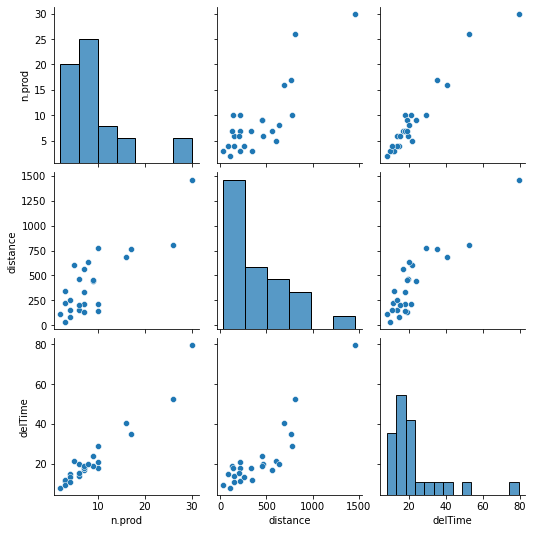

In [4]:
# Visualizing data
import seaborn as sns
sns.pairplot(delivery)


In [5]:
# importing the required module to build the model
from sklearn.linear_model import LinearRegression
# Instantiating the algorithm for building the model
model = LinearRegression()
# selecting the predictors and targets
X = delivery[["n.prod","distance"]]
y = delivery["delTime"]
# building the model using fit() method
model.fit(X,y)
print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)
# Sample output for the above code
# Intercept: 2.3412311451922 
# Coefficients: [1.61590721 0.01438483]


Intercept: 2.3412311451922108 
Coefficients: [1.61590721 0.01438483]


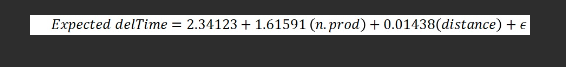

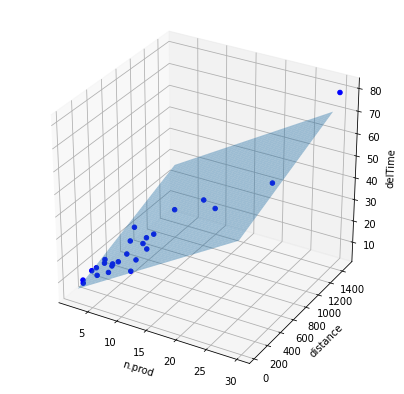

In [8]:
import matplotlib.pyplot as plt
import numpy as np
#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')#projection = '3d' is used to have 3D axes
#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")
#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1) 
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})
#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)
#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.4) # apha => transparency of the surface


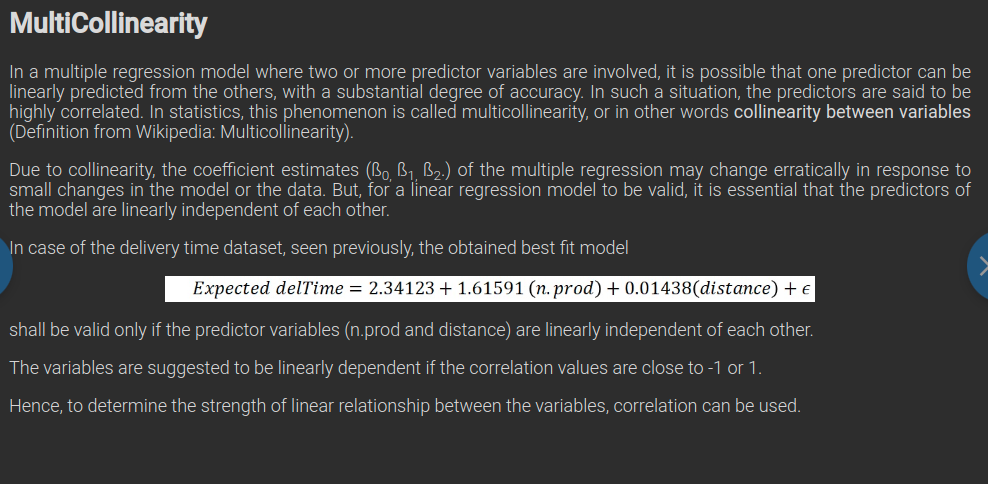

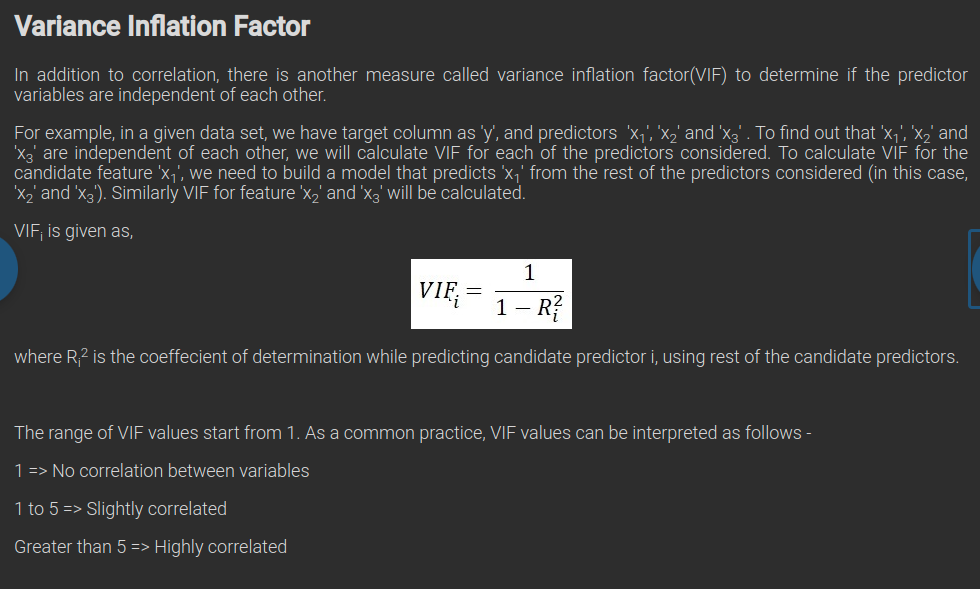

In [9]:
# finding the correlation
np.corrcoef(delivery["n.prod"],delivery["distance"])
# correlation value derived - 0.824215


array([[1.      , 0.824215],
       [0.824215, 1.      ]])

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas.util.testing as tm
#calculating the VIF for each attributes
vif = pd.Series([variance_inflation_factor(X.values,idx) 
           for idx in range(X.shape[1])],
          index=X.columns)
print(vif)


n.prod      7.848245
distance    7.848245
dtype: float64


In [12]:
# score() method for regression model, returns the 'coefficient of determination' (r^2) value for the model
model.score(X,y)
# sample model score as output
#0.9595937494832257


0.9595937494832257

In [13]:
# Model with a single predictor - n.prod
model1 = LinearRegression()
features = ["n.prod"]
target = ["delTime"]
model1.fit(delivery[features],delivery[target])
print(model1.score(delivery[features],delivery[target]))
#sample model1 score
#0.9304813135986855
# Model with multiple predictors - n.prod,distance
model2 = LinearRegression()
features = ["n.prod","distance"]
target = ["delTime"]
model2.fit(delivery[features],delivery[target])
print(model2.score(delivery[features],delivery[target]))
#sample model2 score
#0.9595937494832257


0.9304813135986856
0.9595937494832257


The adjusted R2 is defined as: 

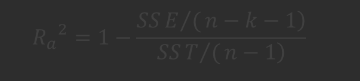

Where, n is the number of observations and k is the number of number of predictor variables in the model. 

The adjusted R2 for the obtained best fit model for the delivery time dataset is shown below. Higher the value of Adjusted R2, better is the model.  

In [14]:
#computation of adjusted R-squared
X = delivery[features]
y = delivery[target]
adjusted_rscore = 1 - (1-model2.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_rscore)
#sample adjusted R-Squared
#0.9559204539817008


0.9559204539817008
